# <b><u> Project Title : Face Emotion Recognition </u></b>

**Project Introduction**

The Indian education landscape has been undergoing rapid changes for the past 10 years owing to
the advancement of web-based learning services, specifically, eLearning platforms.
Global E-learning is estimated to witness an 8X over the next 5 years to reach USD 2B in 2021. India
is expected to grow with a CAGR of 44% crossing the 10M users mark in 2021. Although the market
is growing on a rapid scale, there are major challenges associated with digital learning when
compared with brick and mortar classrooms. One of many challenges is how to ensure quality
learning for students. Digital platforms might overpower physical classrooms in terms of content
quality but when it comes to understanding whether students are able to grasp the content in a live
class scenario is yet an open-end challenge.
In a physical classroom during a lecturing teacher can see the faces and assess the emotion of the
class and tune their lecture accordingly, whether he is going fast or slow. He can identify students who
need special attention. Digital classrooms are conducted via video telephony software program (exZoom) where it’s not possible for medium scale class (25-50) to see all students and access the
mood. Because of this drawback, students are not focusing on content due to lack of surveillance.
While digital platforms have limitations in terms of physical surveillance but it comes with the power of
data and machines which can work for you. It provides data in the form of video, audio, and texts
which can be analysed using deep learning algorithms. Deep learning backed system not only solves
the surveillance issue, but it also removes the human bias from the system, and all information is no
longer in the teacher’s brain rather translated in numbers that can be analysed and tracked.

```
Project Agenda:

* Data Description.

* Defining the problem statement.

* Data Preprocessing.

* Convolutional Neural Network

* Saving and downloading model Artitechture & Weights

* Conclusion
```

**Data Description**

The name of the data set is fer2013 which is an open-source data set that was made publicly available for a Kaggle competition. It contains 48 X 48-pixel grayscale images of the face. There are seven categories (0=Angry, 1=Disgust, 2=Fear, 3=Happy, 4=Sad, 5=Surprise, 6=Neutral) present in the data. The CSV file contains two columns 
1. *emotion* that contains numeric code from 0-6 and 
2.*pixel* column that includes a string surrounded in quotes for each image.

**Problem Statement**

We will solve the above-mentioned challenge by applying deep learning algorithms to live video data.
The solution to this problem is by recognizing facial emotions.




In [ ]:
# Importing the necessary libraries.

from google.colab import files

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.layers import BatchNormalization
from keras.models import Sequential
from keras.layers.core import Flatten, Dense, Dropout, Activation
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import to_categorical
print('Imported the necessary libraries')

Imported the necessary libraries


## **Data Preprocessing**

In [ ]:
# Checkout the dataset.

emotion_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Face Emotion Recognition - Challa Shourya Chandra Sai/fer2013.csv')
emotion_data

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training
...,...,...,...
35882,6,50 36 17 22 23 29 33 39 34 37 37 37 39 43 48 5...,PrivateTest
35883,3,178 174 172 173 181 188 191 194 196 199 200 20...,PrivateTest
35884,0,17 17 16 23 28 22 19 17 25 26 20 24 31 19 27 9...,PrivateTest
35885,3,30 28 28 29 31 30 42 68 79 81 77 67 67 71 63 6...,PrivateTest


In [ ]:
# Checkout the usage columns.

emotion_data['Usage'].unique()

array(['Training', 'PublicTest', 'PrivateTest'], dtype=object)

Under the usage column there are 3 unique values viz. Training, PublicTest, PrivateTest.

I will be using Training data to train the model and PublicTest for testing the model performance.

I won't be using PrivateTest data for validation purposes because of the limited CPU, GPU that I have.

In [ ]:
# Creating X_train, y_train, X_test, y_test.

X_train, y_train, X_test, y_test = [],[],[],[]  # Intializing with an empty list.

for index, row in emotion_data.iterrows():
  k = row['pixels'].split(' ')
  if row['Usage'] == 'Training':
    X_train.append(np.array(k))
    y_train.append(row['emotion'])
  elif row['Usage'] == 'PublicTest':
    X_test.append(np.array(k))
    y_test.append(row['emotion'])

In [ ]:
# Checking whether the lengths of the Training and PublicTest is equal to the X_train, X_test.

train_len1 = len(X_train)
train_len2 = emotion_data[emotion_data['Usage'] == 'Training'].shape[0]

print(f'The length of X_train {train_len1} is equal to length of emotion data when Usage column is equal to Training {train_len2}')

test_len1 = len(X_test)
test_len2 = emotion_data[emotion_data['Usage'] == 'PublicTest'].shape[0]

print(f'The length of X_test {test_len1} is equal to length of emotion data when Usage column is equal to PublicTest {test_len2}')

The length of X_train 28709 is equal to length of emotion data when Usage column is equal to Training 28709
The length of X_test 3589 is equal to length of emotion data when Usage column is equal to PublicTest 3589


In [ ]:
# Converting X_train, X_test, y_train, y_test into an array.

X_train = np.array(X_train).astype('int64')
y_train = np.array(y_train)
X_test = np.array(X_test).astype('int64')
y_test = np.array(y_test)

I have converted X_train, X_test into int64 because they were string in nature.

In [ ]:
# Reshape the images into m*48(input image shape)*48(input image shape)*1 and Y_data into m*num_classes

X_train = X_train.reshape(X_train.shape[0], 48, 48, 1)
X_test = X_test.reshape(X_test.shape[0], 48, 48, 1)

y_train = to_categorical(y_train, num_classes = 7)
y_test = to_categorical(y_test, num_classes = 7)        # One hot encoding for Y_data

Below are the first 10 images of the training data:
-----------------------------------------------------


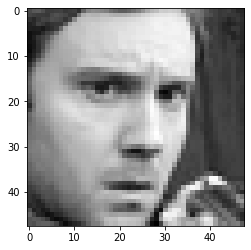

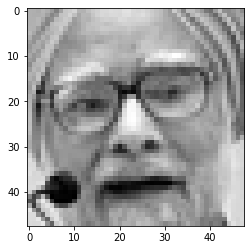

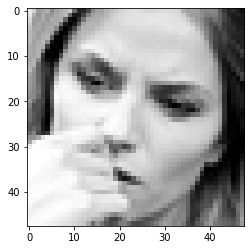

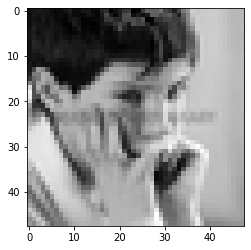

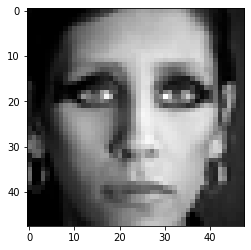

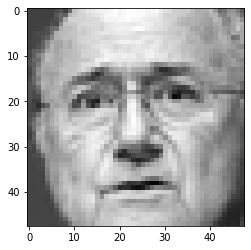

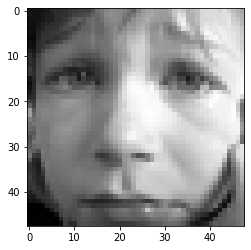

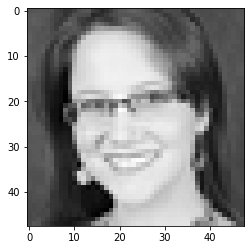

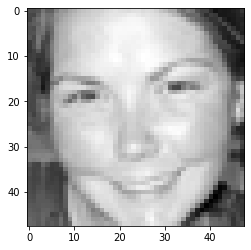

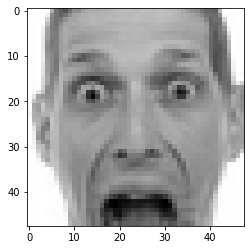

In [ ]:
# Displaying the first 10 images of the training data.

print('Below are the first 10 images of the training data:')
print('-----------------------------------------------------')
for img in range(10):
    plt.figure(img)
    plt.imshow(X_train[img].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

As you can see the images are quite blury because it is a 48 by 48 resolution(low reslution) image.

## **Convolutional Neural Network**

![](model.png)
The model was inspired by Goodfellow, I.J., et.al. (2013) paper. Challenged in representation learning: A report of three machine learning contests. *Neural Networks*, 64, 59-63. [doi:10.1016/j.neunet.2014.09.005](https://arxiv.org/pdf/1307.0414.pdf)

The model has 4 Conv blocks. Each Conv Block includes the following Conv2D, BatchNormalization, Activation, MaxPooling2D, and Dropout. It also has 2 Dense layers. Each Dense layer is followed by BatchNormalization, Activation, and Dropout. 



In [ ]:
# Initializing the model.

model = Sequential()

# 1st Conv block

model.add(Conv2D(filters = 64, kernel_size = (3,3), padding = 'same', input_shape = (48,48,1)))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 2nd Conv block

model.add(Conv2D(filters = 128, kernel_size = (5,5), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))

# 3rd Conv block
          
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
          
# 4th Conv block
          
model.add(Conv2D(filters = 512, kernel_size = (3,3), padding = 'same'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(0.25))
          
model.add(Flatten())
          
model.add(Dense(256))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25))

model.add(Dense(512))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.25)) 

model.add(Dense(7,activation = 'softmax'))

In [ ]:
# Checking out the summary of the model.
print('The architecture of the model is as follows:')
print('---------------------------------------------')
model.summary()

The architecture of the model is as follows:
---------------------------------------------
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 48, 48, 64)        640       
                                                                 
 batch_normalization (BatchN  (None, 48, 48, 64)       256       
 ormalization)                                                   
                                                                 
 activation (Activation)     (None, 48, 48, 64)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 24, 24, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 24, 24, 64)        0         
                               

In [ ]:
# Compiling the model.

opt = Adam(lr = 0.0005)
model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


I have used categorical_crossentropy as the loss function as we have 7 different categories.

In [ ]:
# Training the model.

history = model.fit(X_train,y_train,batch_size=32,epochs=15,verbose=1,validation_data=(X_test, y_test))

Epoch 1/15
898/898 [==============================] - 27s 18ms/step - loss: 1.7784 - accuracy: 0.3179 - val_loss: 1.5353 - val_accuracy: 0.3982
Epoch 2/15
898/898 [==============================] - 17s 19ms/step - loss: 1.4209 - accuracy: 0.4530 - val_loss: 1.3135 - val_accuracy: 0.5046
Epoch 3/15
898/898 [==============================] - 15s 17ms/step - loss: 1.2786 - accuracy: 0.5131 - val_loss: 1.2371 - val_accuracy: 0.5252
Epoch 4/15
898/898 [==============================] - 16s 17ms/step - loss: 1.2074 - accuracy: 0.5410 - val_loss: 1.1972 - val_accuracy: 0.5450
Epoch 5/15
898/898 [==============================] - 15s 17ms/step - loss: 1.1570 - accuracy: 0.5645 - val_loss: 1.2201 - val_accuracy: 0.5166
Epoch 6/15
898/898 [==============================] - 16s 18ms/step - loss: 1.1024 - accuracy: 0.5830 - val_loss: 1.1264 - val_accuracy: 0.5740
Epoch 7/15
898/898 [==============================] - 15s 17ms/step - loss: 1.0588 - accuracy: 0.5998 - val_loss: 1.1734 - val_accuracy:

In [ ]:
# Evaluating the model on test data.

model.evaluate(X_test,y_test)

113/113 [==============================] - 1s 6ms/step - loss: 1.2124 - accuracy: 0.5790


[1.2124247550964355, 0.5789913535118103]

The accuracy of our trained model on test data is around 58-62 percent. This is a good enough model for making predictions.

By changing various others hyperparameters we can furthur improve our model.

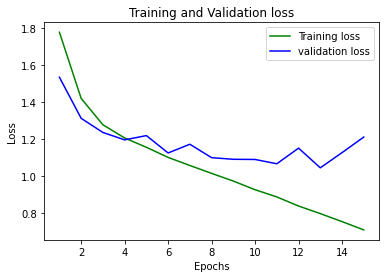

In [ ]:
# Plotting the training and validation loss.

loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,16)
plt.plot(epochs, loss_train, 'g', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

As you can see the general trend of the loss is decreasing with increase in the number of epochs.

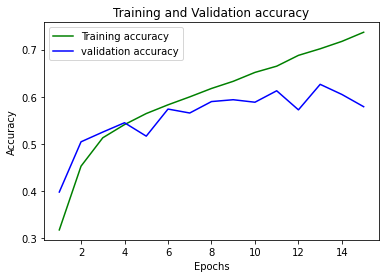

In [ ]:
# Plotting the training accuracy and validation accuracy.

acc_train = history.history['accuracy']
acc_val = history.history['val_accuracy']
epochs = range(1,16)
plt.plot(epochs, acc_train, 'g', label='Training accuracy')
plt.plot(epochs, acc_val, 'b', label='validation accuracy')
plt.title('Training and Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

As you can see the general trend of accuracy is increasing with increase in the number of epochs.

## **Saving and downloading model Artitechture & Weights**

In [ ]:
# Saving the model Artitechture & Weights.

model_json = model.to_json()
with open("model.json", "w") as json_file:
  json_file.write(model_json)
model.save_weights("model.h5")
print("Saved model to drive disk")

Saved model to disk


In [ ]:
# Downloading the model artitechture & Weights to local machine.

files.download("model.json")
files.download('model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Conclusions**


* Using the dataset from kaggle we were able to build a CNN model which is capable of recognizing the facial emotion of a user.

* Pre-processed the data by segmenting the data into X_train,X_test,y_train,y_test with the help of the Usage column in the dataset.Also changed the shape of X_data(X_train,X_test) into m(number of examples) * 48(pixel size of the image) * 48(pixel size of the image) * 1(gray scale). Also performed one-hot encoding on Y_data(Y_train,Y_test) resulting into m(number of examples) * 7(number of classes) shape.

* The model obtained 74% accuracy on training set and 58-63% accuracy on test set. Plotted a line chart of training and testing losses as well as training and testing accuracy. The general trend of losses on both the datasets are in reducing fashion and the general trend of accuracies on both the datasets are in incresing fashion with the increase in the number of epochs.

* Finally, we saved the model weights & artitechture in a h5 & json file respectively.